<a href="https://colab.research.google.com/github/copev313/Deep-Learning-Introduction/blob/main/deep-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Neural Networks**

---


## Introduction #

In the tutorial, we saw how to build deep neural networks by stacking layers inside a `Sequential` model. By adding an *activation function* after the hidden layers, we gave the network the ability to learn more complex (non-linear) relationships in the data.

In these exercises, you'll build a neural network with several hidden layers and then explore some activation functions beyond ReLU. Run this next cell to set everything up!

In [1]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


In the *Concrete* dataset, your task is to predict the compressive strength of concrete manufactured according to various recipes.

Run the next code cell without changes to load the dataset.

In [3]:
import pandas as pd

concrete = pd.read_csv('data/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


---

## 1) Input Shape #

The target for this task is the column `'CompressiveStrength'`. The remaining columns are the features we'll use as inputs.

What would be the input shape for this dataset?

In [6]:
input_shape = [concrete.shape[1] - 1]
print(concrete.shape)


(1030, 9)


---

## 2) Define a Model with Hidden Layers #

Now create a model with three hidden layers, each having 512 units and the ReLU activation.  Be sure to include an output layer of one unit and no activation, and also `input_shape` as an argument to the first layer.

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512,
                 activation='relu',
                 input_shape=[concrete.shape[1] - 1]),
    
    layers.Dense(units=512,
                 activation='relu'),

    layers.Dense(units=512,
                 activation='relu'),
    
    layers.Dense(units=1)
])


---

## 3) Activation Layers #

Let's explore activations functions some.

The usual way of attaching an activation function to a `Dense` layer is to include it as part of the definition with the `activation` argument. Sometimes though you'll want to put some other layer between the `Dense` layer and its activation function. (We'll see an example of this in Lesson 5 with *batch normalization*.) In this case, we can define the activation in its own `Activation` layer, like so:

```
layers.Dense(units=8),
layers.Activation('relu')
```

This is completely equivalent to the ordinary way: `layers.Dense(units=8, activation='relu')`.

Rewrite the following model so that each activation is in its own `Activation` layer.

In [8]:
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1)
])


---

## Optional: Alternatives to ReLU #

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from `'relu'` to one of the others named above. Then run the cell to see the graph. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

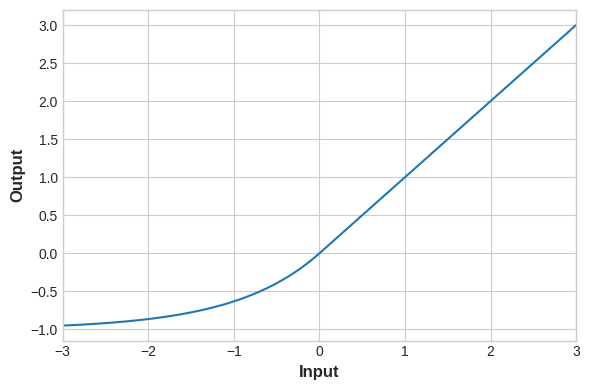

In [14]:
# Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
# Once created, a layer is callable just like a function:
y = activation_layer(x) 

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()